# GAN  모델을 활용한 손글씨 발생기
이전까지 x를 가지고 y를 도출한 것과 달리  
GAN(Generative Adversarial Network)은 x(진짜같은 가짜)를 만드는 모델.  
진위 판별기(Discriminator)와 이를 속이는 생성기(Generator)를 함께 학습시켜  
생성기가 완벽한 가짜를 만들도록 학습.  
참고 : https://neurowhai.tistory.com/103 

In [154]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time

In [140]:
# 손글씨 데이터 준비
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train=x_train.reshape([60000, 28*28])/255
#x_train=x_train[y_train==7] # 특정 숫자만 학습



# 변수
n_input= 28*28 # 이미지 크기
n_hidden=256
n_noise= 128
learning_rate=0.0005

x_size=x_train.shape[0]
batch_size=100


# Discriminator (판별기)
x=tf.placeholder(tf.float32, shape=[None, n_input])

dw1=tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))  # stddev가 크면 nan 발생 가능
db1=tf.Variable(tf.zeros([n_hidden]))

dw2=tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
db2=tf.Variable(tf.zeros([1]))

def D(inputs):
    hidden=tf.nn.relu(tf.matmul(inputs, dw1)+db1)
    result=tf.nn.sigmoid(tf.matmul(hidden, dw2)+db2)
    return result



# Generator (생성기)
z=tf.placeholder(tf.float32, shape=[None, n_noise])

gw1=tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
gb1=tf.Variable(tf.zeros([n_hidden]))

gw2=tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
gb2=tf.Variable(tf.zeros([n_input]))

def G(noises):
    hidden=tf.nn.relu(tf.matmul(noises, gw1)+gb1)
    result=tf.nn.sigmoid(tf.matmul(hidden, gw2)+gb2)
    return result




# 학습용
# var_list : 학습시 정해준 Variable만 조정한다.
loss_D=tf.reduce_mean(-tf.log(D(x)) - tf.log(1-D(G(z))))
train_D=tf.train.AdamOptimizer(learning_rate).minimize(loss_D, var_list=[dw1, db1, dw2, db2])

loss_G=tf.reduce_mean(-tf.log(D(G(z))))
train_G=tf.train.AdamOptimizer(learning_rate).minimize(loss_G, var_list=[gw1, gb1, gw2, gb2])

losses(D, G) :  0.06155221 3.8403382


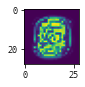

losses(D, G) :  0.69197655 2.8669443


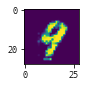

losses(D, G) :  0.74931794 1.8964319


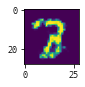

losses(D, G) :  0.78687197 2.0670817


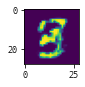

losses(D, G) :  0.6479151 2.3153596


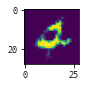

걸린 시간 : 215.79896998405457


In [155]:
# 학습
max_epoch=81
batch_cnt = (x_size-1)//batch_size


sess=tf.Session()
sess.run(tf.global_variables_initializer())
plt.rcParams['figure.figsize']=[1,1]

start=time.time()
for epoch in range(max_epoch):
    for i in range(batch_cnt):
        noises=np.random.uniform(-1,1, size=[batch_size, n_noise])
        _, loss_of_D = sess.run([train_D, loss_D], feed_dict={x:x_train[i*batch_size : (i+1)*batch_size], z:noises})
        _, loss_of_G = sess.run([train_G, loss_G], feed_dict={z:noises})
    
    if epoch%(max_epoch>>2)==0: # 잘 되고 있는지 확인
        print("losses(D, G) : ", loss_of_D, loss_of_G)
        noise=np.random.uniform(-1,1, size=[1, n_noise])
        image=sess.run(G(z), {z:noise})
        image=image.reshape([28,28])
        plt.imshow(image)
        plt.show()
print('걸린 시간 : {}'.format(time.time()-start))


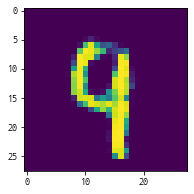

In [196]:
# 가짜 손글씨 랜덤 발생
plt.rcParams['figure.figsize']=[3,3]
noise=np.random.uniform(-1,1,[1, n_noise])

image=sess.run(G(z), {z:noise})
image=image.reshape([28,28])
plt.imshow(image)